In [1]:
import numpy as np
import pandas as pd
from main import load_data, load_model

#create artficial dataset with features age - numerical, height - numerical, gender - categorical (m/w/d) and predict health risk - ordinal (low, medium, high)
np.random.seed(42)
n = 1000
age = np.random.randint(18,100,n)
height = np.random.randint(140,210,n)
gender = np.random.choice(["m","w","d"],n)
#calculate continuous health risk
health_risk =  0.3*np.array([1 if g == "w" else 0 for g in gender]) + 0.05*np.random.randn(n) + 0.6*age/100 + 0.1*height/200
#transform continuous health risk to ordinal health risk
health_risk = pd.qcut(health_risk,3,labels=[0,1,2])
df = pd.DataFrame({"age":age,"height":height, "gender":gender, "health_risk":health_risk})
df.to_csv("data/dummy.csv",index=False,sep=";")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3579, in run_code
  File "C:\Users\wankm\AppData\Local\Temp\ipykernel_15928\798335219.py", line 2, in <module>
    np.random.seed(42)
    ^^
NameError: name 'np' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2170, in showtraceback
  File "c:\Users\wankm\Projects\ordinal_xai\venv\Lib\site-packages\IPython\core\ultratb.py", line 1457, in structured_traceback
  File "c:\Users\wankm\

In [4]:
from models.clm import CLM
X,y = load_data("dummy.csv")

model = load_model("CLM",link="logit")

model.fit(X,y)

y_pred = model.predict(X)

y_prob = model.predict_proba(X)

y_pred,y_prob

model.params_




array([ 5.26940835,  0.37036894, -0.06415992, 10.62216765, -0.28741469,
        1.91846704])

In [7]:
from interpretation.pfi import PFI
int = PFI(model,X,y)

results = int.explain()


In [1]:
import numpy as np
# Create simple test data
y_true = np.array([0, 1, 2, 1, 0])
y_perfect_pred_proba = np.array([
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 1.0, 0.0],  # Class 1
    [1.0, 0.0, 0.0]   # Class 0
])
y_perfect_pred = y_perfect_pred_proba.argmax(axis=1)
y_worst_pred_proba = np.array([
    [0.0, 0.0, 1.0],  # Class 2
    [1.0, 0.0, 0.0],  # Class 0
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 0.0, 1.0]   # Class 2
])
y_worst_pred = y_worst_pred_proba.argmax(axis=1)
y_uncertain_pred_proba = np.array([
    [0.5, 0.3, 0.2],  # Class 0
    [0.2, 0.5, 0.3],  # Class 1
    [0.1, 0.2, 0.7],  # Class 2
    [0.3, 0.4, 0.3],  # Class 1
    [0.8, 0.1, 0.1]   # Class 0
])
y_uncertain_pred = y_uncertain_pred_proba.argmax(axis=1)
y_one_error_pred_proba = np.array([
    [1.0, 0.0, 0.0],  # Class 0
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0],  # Class 2
    [0.0, 1.0, 0.0],  # Class 1
    [0.0, 0.0, 1.0]   # Class 0
])
y_one_error_pred = y_one_error_pred_proba.argmax(axis=1)

In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate features
# 5 standard informative features
informative_features = {
    f'X_inf_{i}': np.random.normal(0, 1, n_samples) for i in range(5)
}

# 2 interaction-only informative features
interaction_features = {
    f'X_inter_{i}': np.random.normal(0, 1, n_samples) for i in range(2)
}
interaction_term = interaction_features['X_inter_0'] * interaction_features['X_inter_1']

# 3 features that only affect specific rank borders
border_features = {
    f'X_border_{i}': np.random.normal(0, 1, n_samples) for i in range(3)
}

# 20 noise features (now normally distributed)
noise_features = {
    f'X_noise_{i}': np.random.normal(0, 1, n_samples) for i in range(20)
}

# Correlated features
# Very strong correlation with X_inf_0
X_corr_strong = informative_features['X_inf_0'] + np.random.normal(0, 0.05, n_samples)
X_corr_strong = (X_corr_strong - np.mean(X_corr_strong)) / np.std(X_corr_strong)

# Very weak correlation with X_inf_1
X_corr_weak = informative_features['X_inf_1'] + np.random.normal(0, 2.0, n_samples)
X_corr_weak = (X_corr_weak - np.mean(X_corr_weak)) / np.std(X_corr_weak)

# Latent variable with standard linear informative features
latent = (2.0 * informative_features['X_inf_0']
          - 1.5 * informative_features['X_inf_1']
          + 1.2 * informative_features['X_inf_2']
          - 0.7 * informative_features['X_inf_3']
          + 0.5 * informative_features['X_inf_4']
          + np.random.normal(0, 0.7, n_samples))

# Add interaction term effect across all samples
latent += 2.0 * interaction_term

# Add border-specific effects
latent_adjusted = latent.copy()
latent_adjusted[(latent > -1.5) & (latent <= 0)] += 1.5 * border_features['X_border_0'][(latent > -1.5) & (latent <= 0)]
latent_adjusted[(latent > 0) & (latent <= 1.5)] += 1.5 * border_features['X_border_1'][(latent > 0) & (latent <= 1.5)]
latent_adjusted[(latent > 1.5) & (latent <= 3)] += 1.5 * border_features['X_border_2'][(latent > 1.5) & (latent <= 3)]

# Define thresholds for 5 classes
thresholds = [-np.inf, -1.5, 0, 1.5, 3, np.inf]

# Assign ordinal categories
y = np.digitize(latent_adjusted, thresholds) - 1

# Combine all features into a DataFrame
data = pd.DataFrame({**informative_features, **interaction_features, **border_features, **noise_features})
data['X_corr0_strong'] = X_corr_strong
data['X_corr1_weak'] = X_corr_weak
data['y'] = y

# Save to CSV
data.to_csv('data/FI_test.csv', index=False, sep=';')

print(data.head())



    X_inf_0   X_inf_1   X_inf_2   X_inf_3   X_inf_4  X_inter_0  X_inter_1  \
0  0.496714  1.399355 -0.675178 -1.907808 -0.863494  -0.423760  -1.114081   
1 -0.138264  0.924634 -0.144519 -0.860385 -0.031203  -0.453414  -0.630931   
2  0.647689  0.059630 -0.792420 -0.413606  0.018017  -1.795643  -0.942060   
3  1.523030 -0.646937 -0.307962  1.887688  0.472630  -0.330090  -0.547996   
4 -0.234153  0.698223 -1.893615  0.556553 -1.366858   0.732829  -0.214150   

   X_border_0  X_border_1  X_border_2  ...  X_noise_13  X_noise_14  \
0    0.785185   -0.033025    0.765402  ...    2.198837   -0.671374   
1   -1.777681   -0.503650    1.073413  ...    0.343355   -0.713799   
2    0.714746   -0.172375    0.498690  ...   -0.233590    1.425406   
3   -0.233724    0.714732   -1.942498  ...    0.976983    1.864414   
4    0.707458    1.277857   -0.155422  ...    0.842069   -0.928882   

   X_noise_15  X_noise_16  X_noise_17  X_noise_18  X_noise_19  X_corr0_strong  \
0    0.170874   -0.141343   -0.7837

In [12]:
#simple version
n_samples=1000
# Generate features
# 5 standard normal features
features = {
    f'X_{i}': np.random.normal(0, 1, n_samples) for i in range(5)
}

latent = 3 * features["X_0"] - 2 * features["X_1"] - features["X_2"] + np.random.normal(0,1,n_samples) # 4 and 5 are noise
# Define thresholds for 5 classes
thresholds = [-np.inf, -1.5, 0, 1.5, 3, np.inf] 

# Assign ordinal categories
y = np.digitize(latent, thresholds) - 1

data = pd.DataFrame({**features})
data["y"] = y
# Save to CSV
data.to_csv('data/FI_simple.csv', index=False, sep=';')

print(data.head()) 



        X_0       X_1       X_2       X_3       X_4  y
0  0.960895 -0.875781  0.038162  1.261745  0.193257  4
1 -0.369965  0.434668 -0.585079  0.007531 -0.292425  0
2 -0.579581 -0.193942  0.296729  2.066886  0.466237  0
3  0.933312  0.784308  1.124690  0.849618 -1.607576  2
4 -2.731540 -1.300966 -0.298190  0.574162  1.104704  0


In [3]:
import numpy as np
from utils.evaluation_metrics import cem,_calculate_proximity,_get_class_counts

y_true = np.array([0, 1, 2, 1, 0])
y_pred = np.array([2, 0, 0, 2, 2])

cem(y_true,y_true)









1.0

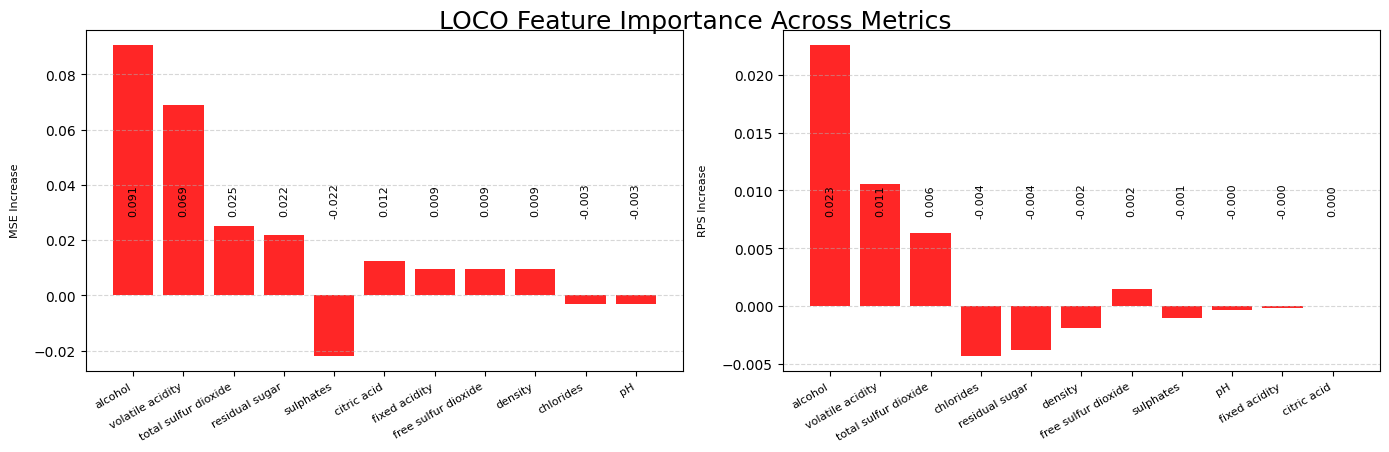

{'feature_importance': {'fixed acidity': {'mse': 0.009375000000000022,
   'ranked_probability_score': -0.0001391572526580065},
  'volatile acidity': {'mse': 0.06874999999999998,
   'ranked_probability_score': 0.01054921481361154},
  'citric acid': {'mse': 0.012499999999999956,
   'ranked_probability_score': 6.376247600481388e-05},
  'residual sugar': {'mse': 0.021874999999999978,
   'ranked_probability_score': -0.0037808788314978026},
  'chlorides': {'mse': -0.0031250000000000444,
   'ranked_probability_score': -0.004279243536805588},
  'free sulfur dioxide': {'mse': 0.009375000000000022,
   'ranked_probability_score': 0.001504580529231525},
  'total sulfur dioxide': {'mse': 0.025000000000000022,
   'ranked_probability_score': 0.006326146815875677},
  'density': {'mse': 0.009375000000000022,
   'ranked_probability_score': -0.001865418816886566},
  'pH': {'mse': -0.0031250000000000444,
   'ranked_probability_score': -0.0002851983175329864},
  'sulphates': {'mse': -0.021874999999999978,


In [ ]:
from sklearn import metrics
from interpretation.lime import LIME
from interpretation.loco import LOCO
from interpretation.pfi import PermutationImportance

from main import load_data, load_model

X,y = load_data("winequality-red.csv")

model = load_model("CLM",link_function="logit")

model.fit(X,y)

loco = LOCO(model,X,y,metrics=["mse","ranked_probability_score"])
loco.explain(plot=True)
















summand 0 -0.04833328709268657
summand 1 -0.027153089545221106
summand 2 -0.0
summand 3 -0.2793642694870114
summand 4 -0.0029910253436346715
summand 5 -0.0007504172615193719
summand 6 -2.4779733820500397e-11
0.3585920887548528
summand 0 -0.007531112733698741
summand 1 -0.026651999057404407
summand 2 -0.0
summand 3 -0.5494404378465265
summand 4 -0.0166939941927083
summand 5 -0.0013913758435807487
summand 6 -8.572698106954795e-12
0.6017089196824914
summand 0 -0.09666657418537314
summand 1 -0.027153089545221106
summand 2 -0.0
summand 3 -0.2793642694870114
summand 4 -0.005982050687269343
summand 5 -0.0022512517845581156
summand 6 -9.911893528200159e-11
0.411417235788552
summand 0 -0.015062225467397482
summand 1 -0.026651999057404407
summand 2 -0.0
summand 3 -0.5494404378465265
summand 4 -0.0333879883854166
summand 5 -0.004174127530742246
summand 6 -3.429079242781918e-11
0.628716778321778


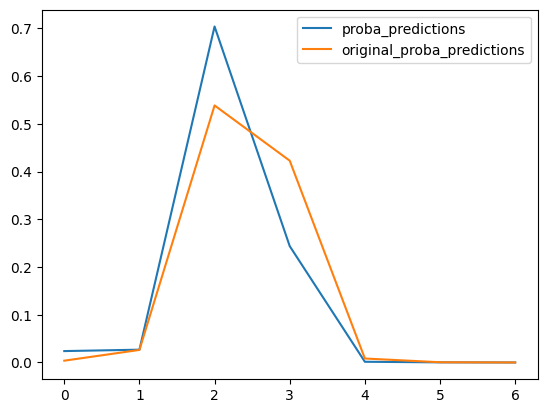

In [2]:
#test ordinal weighted ce
from utils.evaluation_metrics import ordinal_weighted_ce
import numpy as np
proba_predictions = np.array([[2.38769684e-02, 2.67877585e-02, 7.03855139e-01, 2.43735631e-01,
  1.49439495e-03, 2.50107805e-04, 6.19488156e-12]])
original_proba_predictions = np.array([[3.75847555e-03, 2.62999689e-02, 5.38438353e-01, 4.22727260e-01,
  8.31225764e-03, 4.63684413e-04, 2.14322101e-12]])
y_true = [2]

print(ordinal_weighted_ce(y_true,proba_predictions,alpha=1,zero_indexed=True))
print(ordinal_weighted_ce(y_true,original_proba_predictions,alpha=1,zero_indexed=True))

print(ordinal_weighted_ce(y_true,proba_predictions,alpha=2,zero_indexed=True))
print(ordinal_weighted_ce(y_true,original_proba_predictions,alpha=2,zero_indexed=True))


from matplotlib import pyplot as plt
plt.plot(proba_predictions[0],label="proba_predictions")
plt.plot(original_proba_predictions[0],label="original_proba_predictions")
plt.legend()
plt.show()




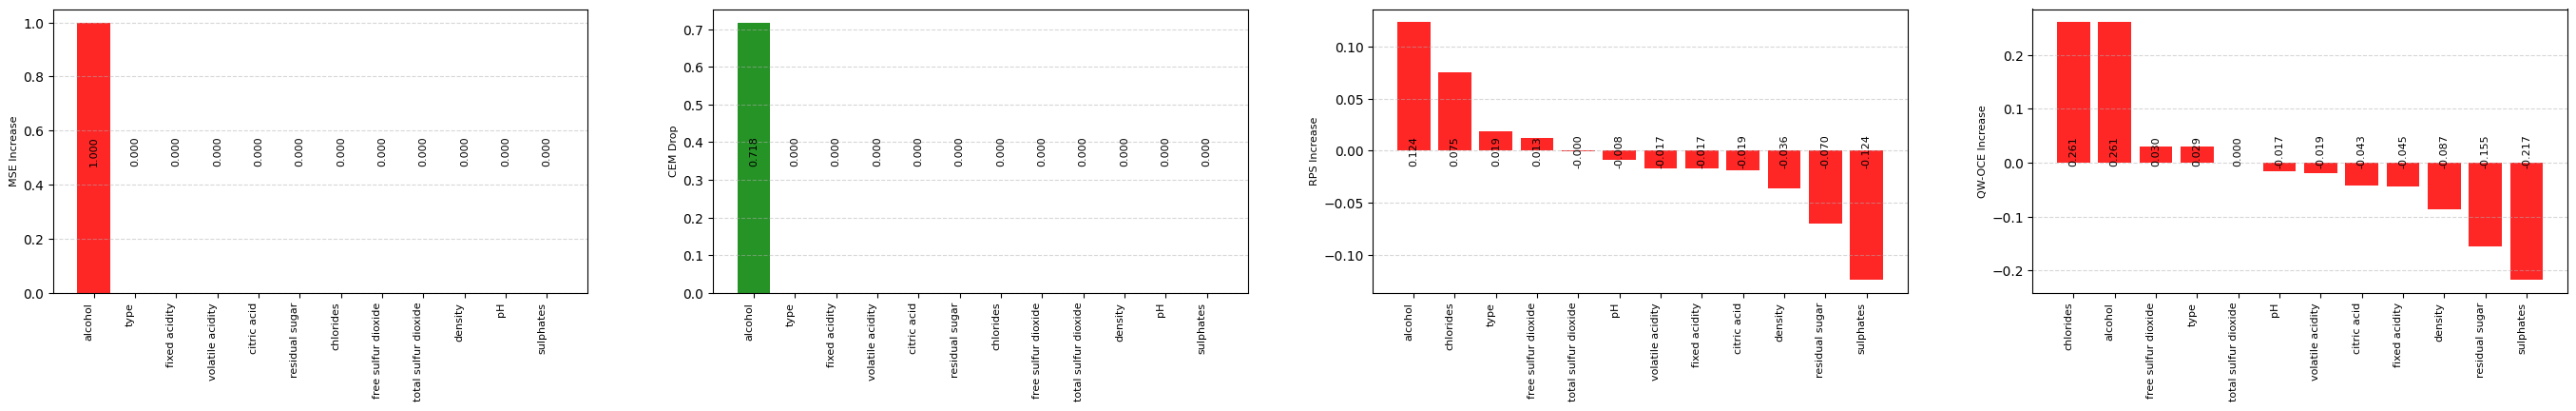

In [2]:
#train obd model and generate loco for metrics of mse,cem,rps,qwce

from ordinal_xai.models.obd import OBD
from ordinal_xai.interpretation.loco import LOCO
from ordinal_xai.interpretation.pfi import PFI
from ordinal_xai.utils.data_utils import load_data


X,y = load_data("ordinal_xai/data/winequality.csv")
model = OBD()
model.fit(X,y)

loco = LOCO(model,X,y)
result = loco.explain(plot=True,observation_idx=17,metrics=['mse','cem','ranked_probability_score','ordinal_weighted_ce_quadratic'],title=False)




In [12]:
def mse_all_zero(imp_dict: dict, *, atol: float = 1e-12) -> bool:
    """
    Return True iff every feature’s MSE importance is (numerically) zero.

    Parameters
    ----------
    imp_dict : dict
        The full importance dictionary that has a top-level key
        'feature_importance', whose values are per-feature sub-dicts.
    atol : float, optional
        Absolute tolerance for comparing floats to zero.  Defaults to 1e-12.

    Examples
    --------
    >>> mse_all_zero(data)          # data is the dict you showed
    False
    """
    fi = imp_dict.get("feature_importance", {})
    from math import isclose
    return all(
        isclose(feature_vals.get("mse", 0.0), 0.0, abs_tol=atol)
        for feature_vals in fi.values()
    )

result = loco.explain(observation_idx=0,metrics=['mse'])
mse_all_zero(result)

True

In [13]:
results={}
zero = 0
for i in range(len(X)):

    results[i] = loco.explain(observation_idx=i, metrics=['mse'])
    if mse_all_zero(results[i]):
        zero += 1
print(zero, len(X),zero/len(X))


4592 6497 0.7067877481914729


In [19]:
from __future__ import annotations

"""Utility functions for analysing feature importances.

This module offers a one-stop helper to:
1. Rank features for every available metric in a nested importance‐dict produced by
   LOCO / PFI or similar routines (format shown below).
2. Compute Spearman rank correlations between every pair of metrics.
3. Display the correlations as a heatmap for quick visual inspection.

Expected structure of *importance_dict*::

    {
        "feature_importance": {
            "feature_1": {"mse": 0.1, "cem": 0.05, ...},
            "feature_2": {"mse": -0.2, "cem": 0.0,  ...},
            ...
        },
        ...  # other keys ignored by this module
    }

The helper uses the absolute magnitude of importance values by default so that
negative improvements (e.g. negative drop-in metrics) still rank as highly
important.  This behaviour can be toggled via *abs_importance*.
"""

from typing import Dict, Tuple, Optional

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

__all__ = [
    "feature_rank_correlation_heatmap",
]


def _extract_importance_df(importance_dict: Dict) -> pd.DataFrame:
    """
    Convert *importance_dict* to a DataFrame [n_features × n_metrics].

    Supports two layouts:
    1. LOCO/ICE – top-level key 'feature_importance'
       ↳ feature → {metric: value}
    2. PFI – metric → {'features': [...], 'importances_mean': [...]}
    """
    # ── Case 1: LOCO/ICE style ────────────────────────────────────────────
    if "feature_importance" in importance_dict:
        fi = importance_dict["feature_importance"]
        return pd.DataFrame.from_dict(fi, orient="index")

    # ── Case 2: PFI style ────────────────────────────────────────────────
    sample_val = next(iter(importance_dict.values()), None)
    if (
        isinstance(sample_val, dict)
        and "features" in sample_val
        and "importances_mean" in sample_val
    ):
        nested: Dict[str, Dict[str, float]] = {}
        for metric, m_dict in importance_dict.items():
            feats = m_dict.get("features")
            means = m_dict.get("importances_mean")
            if feats is None or means is None:
                continue
            for f, val in zip(feats, means):
                nested.setdefault(f, {})[metric] = float(val)

        return pd.DataFrame.from_dict(nested, orient="index")

    # ── Unknown layout ───────────────────────────────────────────────────
    raise ValueError(
        "Unsupported structure: expected either a 'feature_importance' key "
        "or metric-level dicts with 'features' and 'importances_mean'."
    )


def feature_rank_correlation_heatmap(
    importance_dict: Dict,
    *,
    abs_importance: bool = True,
    cmap: str = "coolwarm",
    annot: bool = True,
    ax: Optional[plt.Axes] = None,
    figsize: Tuple[int, int] = (6, 5),
) -> Tuple[pd.DataFrame, plt.Axes]:
    """Plot a heatmap of Spearman rank correlations between metrics.

    Parameters
    ----------
    importance_dict : dict
        Nested dictionary with per-feature metric values (see module docstring).
    abs_importance : bool, default ``True``
        Use absolute values when ranking.  Set to ``False`` to keep signs.
    cmap : str or matplotlib Colormap, default "coolwarm"
        Colormap passed to :pyfunc:`seaborn.heatmap`.
    annot : bool, default ``True``
        Write correlation coefficients into the heatmap cells.
    ax : matplotlib Axes, optional
        Draw on the given axes; otherwise a new figure/axes pair is created.
    figsize : tuple(int, int), default ``(6, 5)``
        Figure size used when *ax* is ``None``.

    Returns
    -------
    corr_df : pandas.DataFrame
        Symmetric matrix of pairwise Spearman correlations (index & columns are metrics).
    ax : matplotlib Axes
        The axes object containing the heatmap.
    """

    df = _extract_importance_df(importance_dict)

    if abs_importance:
        df = df.abs()

    # Rank features per metric (1 = most important). "average" handles ties gracefully.
    ranks = df.rank(method="average", ascending=False)

    # Spearman correlation on the rank matrix
    corr_df = ranks.corr(method="spearman")

    # ----- Plot ------------------------------------------------------------
    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    sns.heatmap(
        corr_df,
        cmap=cmap,
        vmin=-1,
        vmax=1,
        center=0,
        square=True,
        annot=annot,
        fmt=".2f",
        ax=ax,
    )
    ax.set_title("Spearman rank correlation of feature importances")

    return corr_df, ax



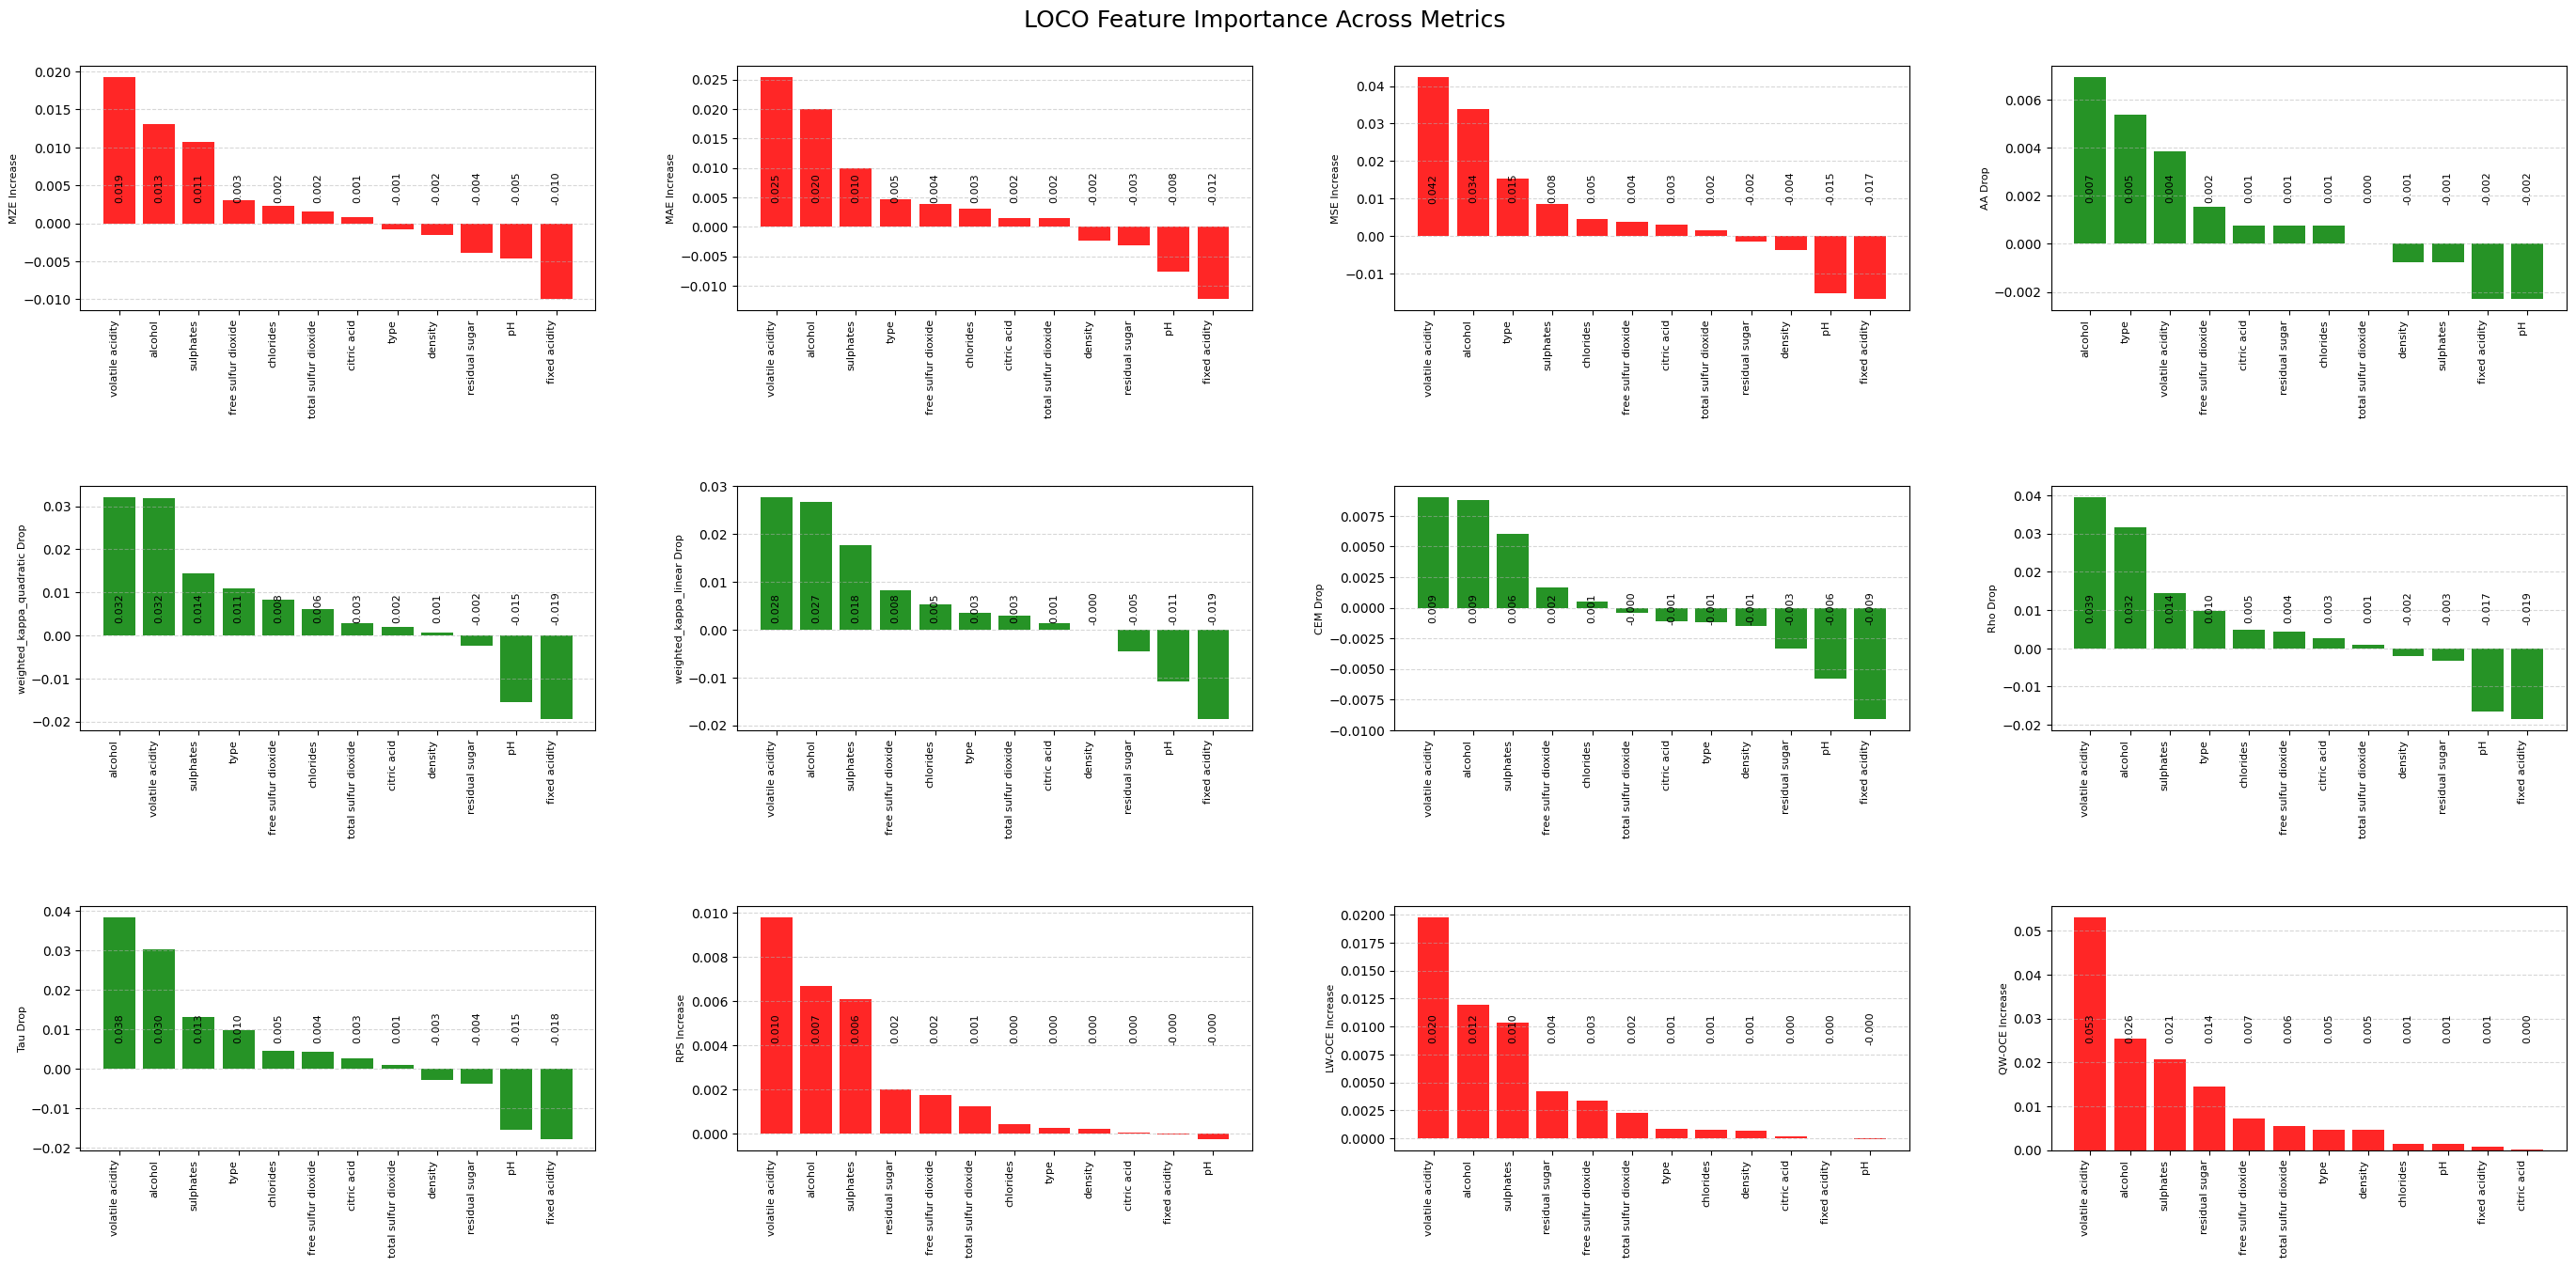

(                                    mze       mae       mse  \
 mze                            1.000000  0.870181  0.707532   
 mae                            0.870181  1.000000  0.924430   
 mse                            0.707532  0.924430  1.000000   
 adjacent_accuracy              0.468580  0.791002  0.851472   
 weighted_kappa_quadratic       0.790210  0.940357  0.893171   
 weighted_kappa_linear          0.923077  0.933339  0.812611   
 cem                            0.881119  0.880707  0.753066   
 spearman_correlation           0.811189  0.968427  0.956219   
 kendall_tau                    0.832168  0.978953  0.966727   
 ranked_probability_score       0.594406  0.442108  0.213661   
 ordinal_weighted_ce_linear     0.496503  0.378950  0.154116   
 ordinal_weighted_ce_quadratic  0.594406  0.473687  0.234676   
 
                                adjacent_accuracy  weighted_kappa_quadratic  \
 mze                                     0.468580                  0.790210   
 mae    

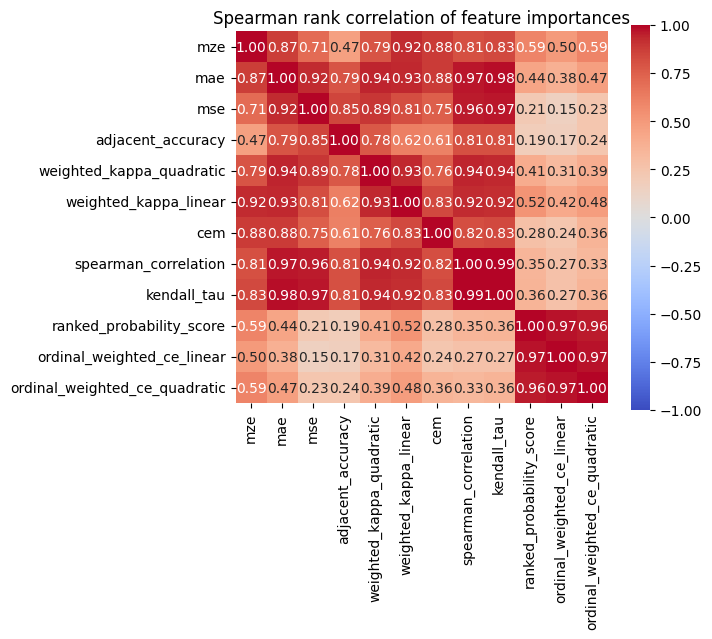

In [39]:
loco = LOCO(model,X,y)

model = load_model('CLM')
model.fit(X, y)

importance_dict = loco.explain(plot=True)

feature_rank_correlation_heatmap(importance_dict)

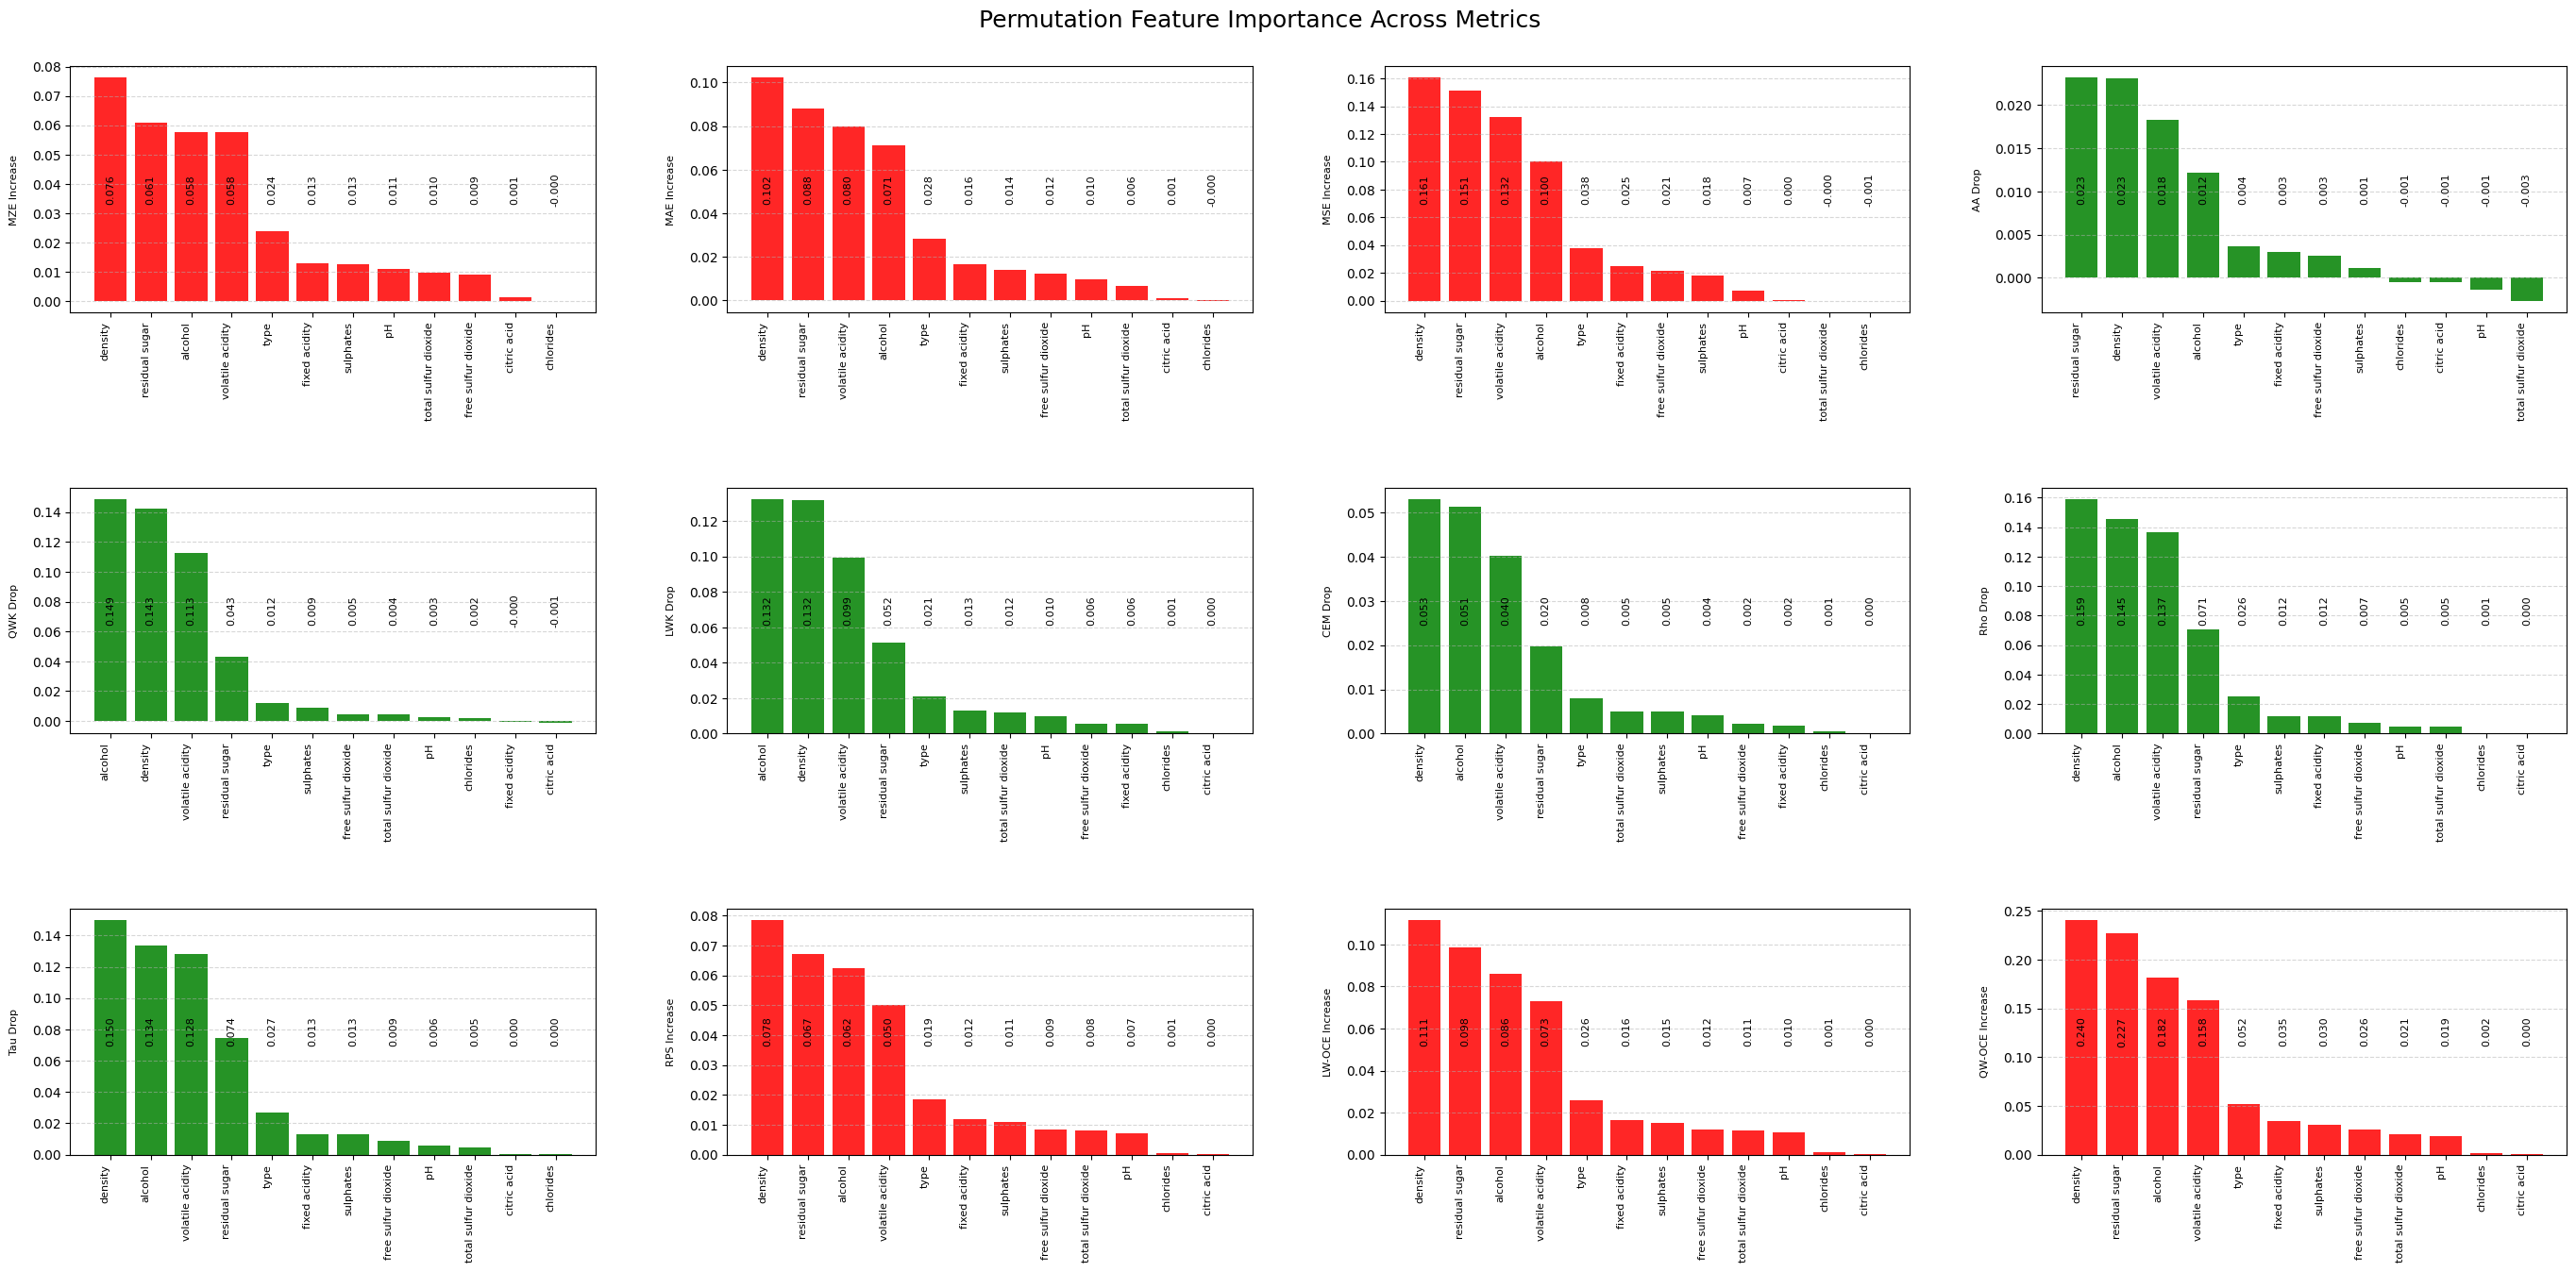

(                                    mze       mae       mse  \
 mze                            1.000000  0.972028  0.923077   
 mae                            0.972028  1.000000  0.972028   
 mse                            0.923077  0.972028  1.000000   
 adjacent_accuracy              0.923077  0.930070  0.902098   
 quadratic_weighted_kappa       0.783217  0.790210  0.776224   
 linear_weighted_kappa          0.881119  0.846154  0.804196   
 cem                            0.881119  0.846154  0.804196   
 spearman_correlation           0.944056  0.958042  0.944056   
 kendall_tau                    0.958042  0.972028  0.944056   
 ranked_probability_score       0.965035  0.979021  0.965035   
 ordinal_weighted_ce_linear     0.965035  0.979021  0.965035   
 ordinal_weighted_ce_quadratic  0.965035  0.979021  0.965035   
 
                                adjacent_accuracy  quadratic_weighted_kappa  \
 mze                                     0.923077                  0.783217   
 mae    

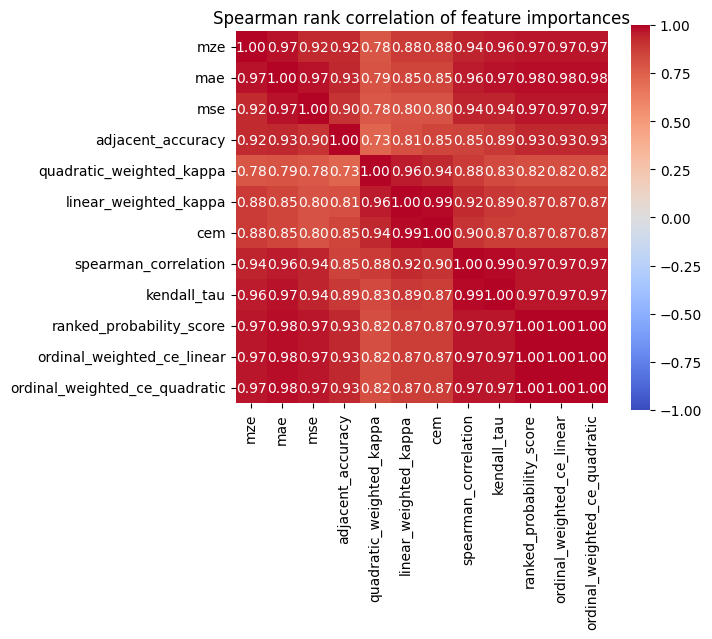

In [35]:
model = load_model('CLM')
model.fit(X, y)

pfi = PFI(model, X, y)

importance_dict_pfi = pfi.explain(plot=True)
feature_rank_correlation_heatmap(importance_dict_pfi)



In [44]:
df = pd.read_csv("ordinal_xai/data/winequality.csv", sep=";")
df["type"].unique()

array(['red', 'white'], dtype=object)

In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


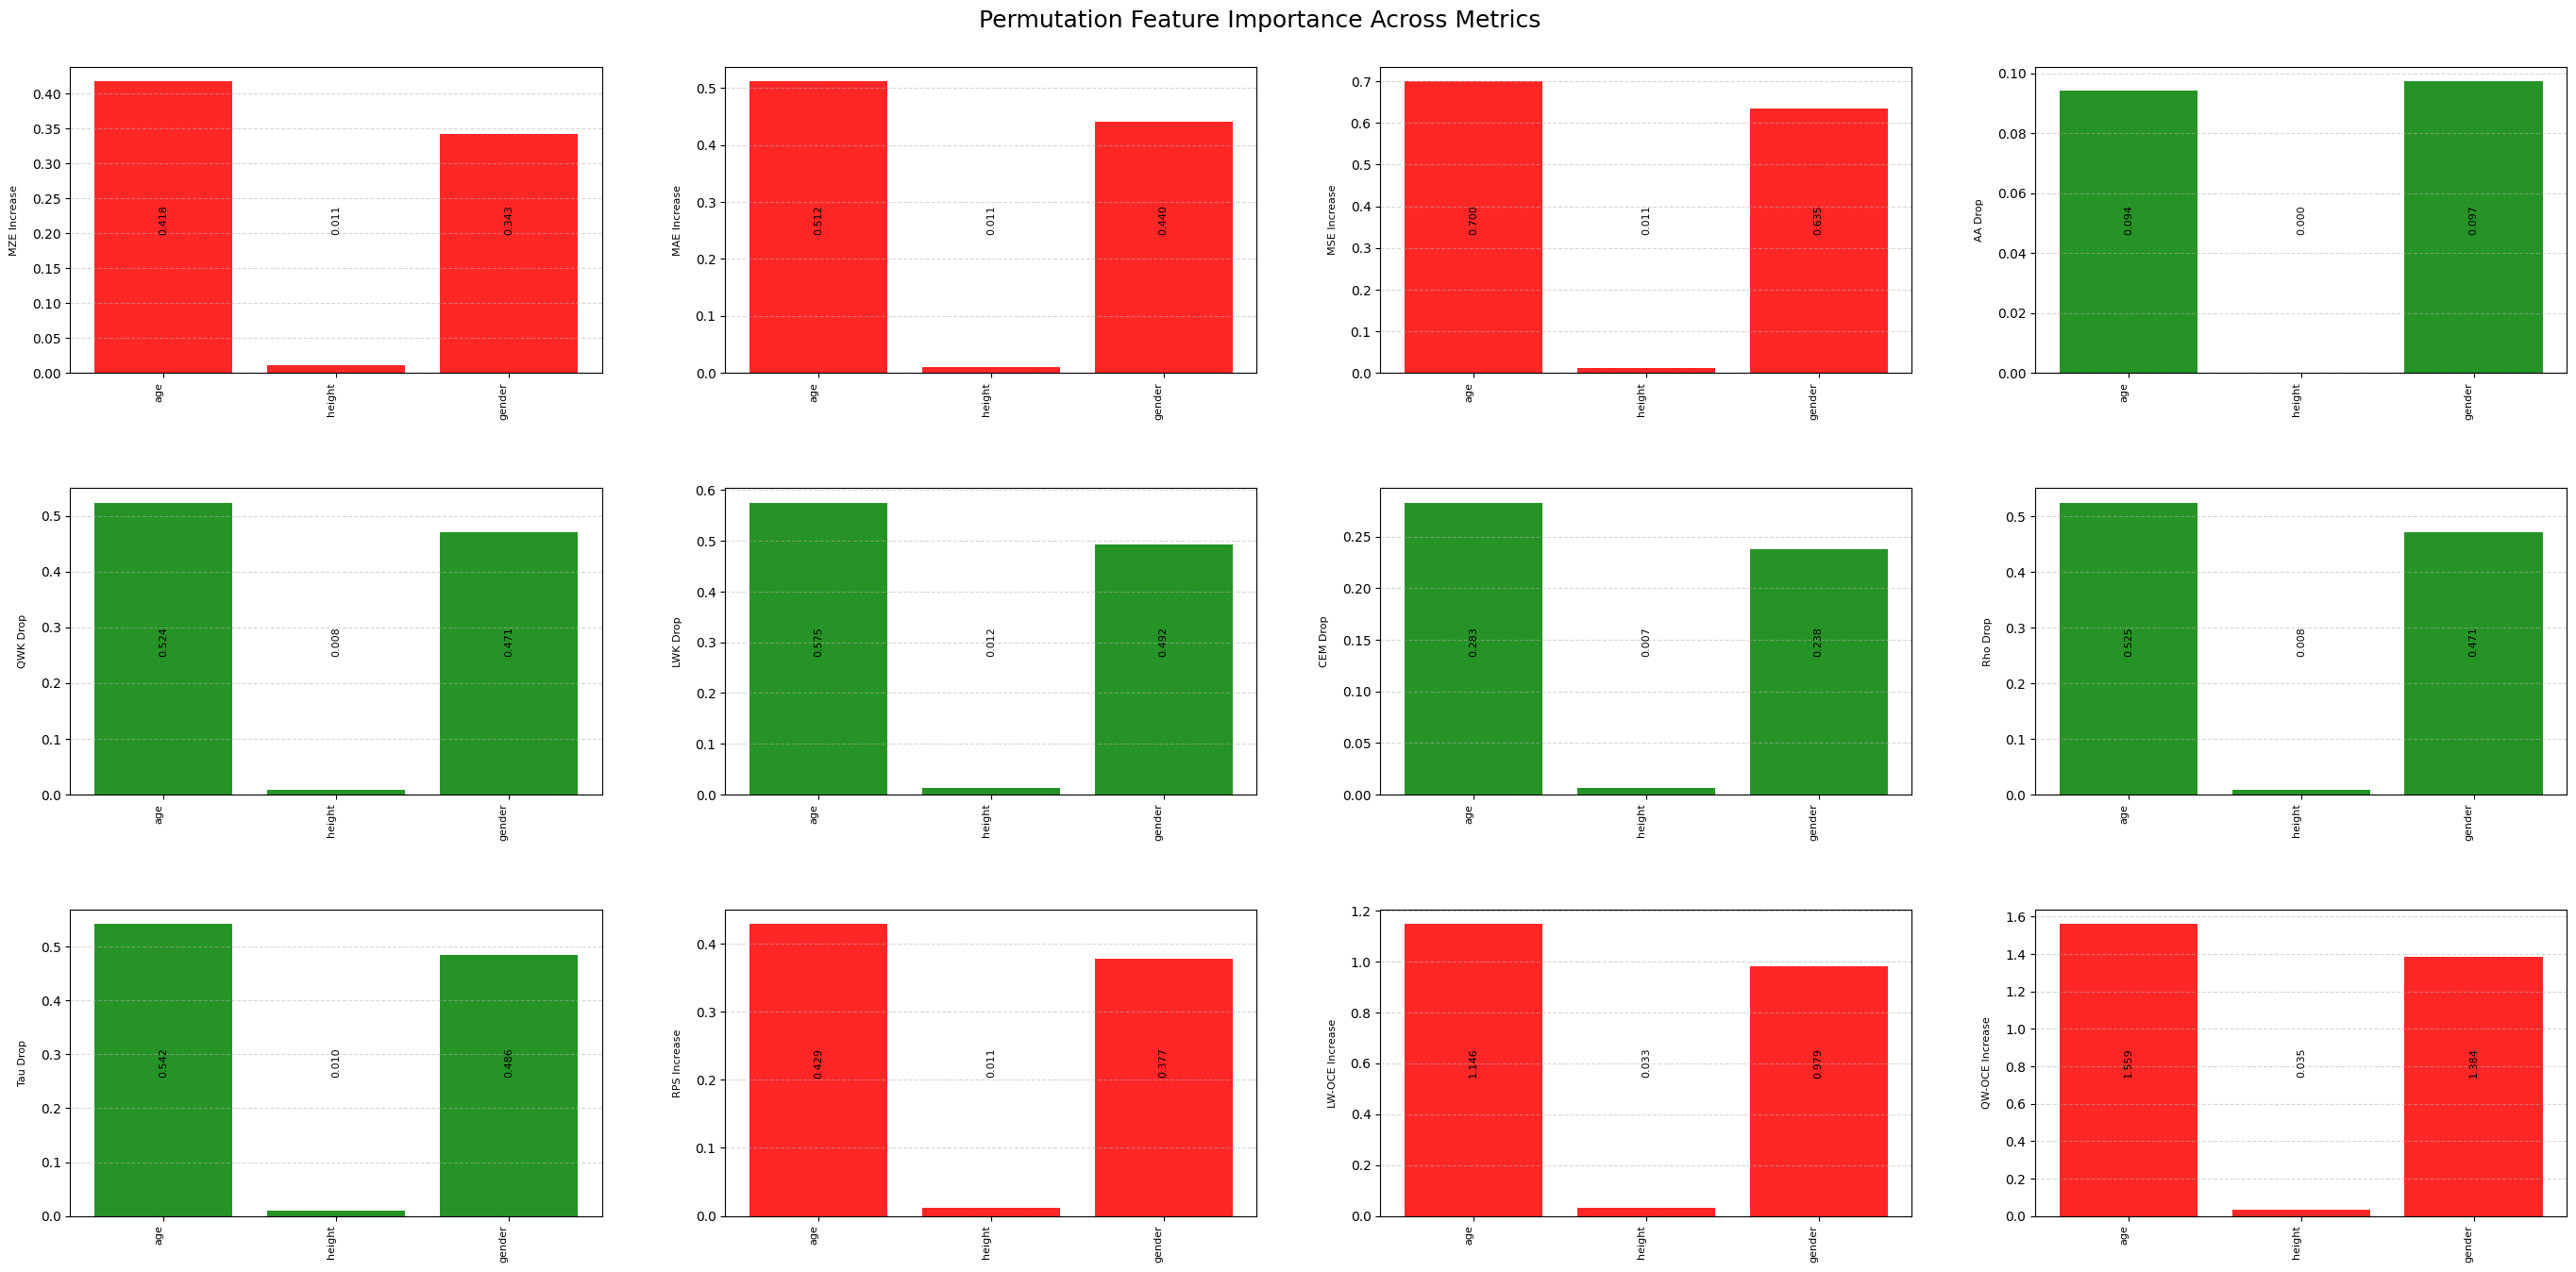

{'mze': {'features': ['age', 'height', 'gender'],
  'importances_mean': array([0.4178, 0.0106, 0.3426]),
  'importances_std': array([0.01735972, 0.00174356, 0.01460959]),
  'importances': array([[0.441, 0.429, 0.394, 0.402, 0.423],
         [0.009, 0.012, 0.012, 0.008, 0.012],
         [0.336, 0.35 , 0.343, 0.364, 0.32 ]])},
 'mae': {'features': ['age', 'height', 'gender'],
  'importances_mean': array([0.512 , 0.0106, 0.44  ]),
  'importances_std': array([0.0179555 , 0.00174356, 0.01627268]),
  'importances': array([[0.533, 0.528, 0.489, 0.493, 0.517],
         [0.009, 0.012, 0.012, 0.008, 0.012],
         [0.447, 0.436, 0.441, 0.463, 0.413]])},
 'mse': {'features': ['age', 'height', 'gender'],
  'importances_mean': array([0.7004, 0.0106, 0.6348]),
  'importances_std': array([0.02027412, 0.00174356, 0.02778777]),
  'importances': array([[0.717, 0.726, 0.679, 0.675, 0.705],
         [0.009, 0.012, 0.012, 0.008, 0.012],
         [0.669, 0.608, 0.637, 0.661, 0.599]])},
 'adjacent_accuracy

In [4]:
from ordinal_xai.interpretation import PFI
from ordinal_xai.models import OBD
from ordinal_xai.utils import load_data

X,y = load_data("data/dummy.csv")

model = OBD(base_classifier="rf")

model.fit(X,y)

interpretation = PFI(model,X,y)

interpretation.explain(plot=True)



In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [1]:
from ordinal_xai.utils import load_data

In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [1]:
from ordinal_xai.models import OGBoost
from ordinal_xai.utils import load_data, evaluate_ordinal_model, print_evaluation_results
from sklearn.model_selection import train_test_split

X,y = load_data("ordinal_xai/data/winequality-red.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = OGBoost()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_train_proba = model.predict_proba(X_train)
y_pred_test_proba = model.predict_proba(X_test)

print("Train")
print_evaluation_results(evaluate_ordinal_model(y_train,y_pred_train,y_pred_train_proba))
print("Test")
print_evaluation_results(evaluate_ordinal_model(y_test,y_pred_test,y_pred_test_proba))



Train

Ordinal Regression Evaluation Results:
--------------------------------------------------
Hard Label Metrics:
  Accuracy: 0.6896
  Adjacent Accuracy: 0.9906
  Mze: 0.3104
  Mae: 0.3198
  Mse: 0.3385
  Weighted Kappa Quadratic: 0.6768
  Weighted Kappa Linear: 0.5709
  Cem: 0.7396
  Spearman Correlation: 0.6962
  Kendall Tau: 0.6609

Probability-Based Metrics:
  Ranked Probability Score: 0.2348
  Ordinal Weighted Ce Linear: 0.6712
  Ordinal Weighted Ce Quadratic: 0.7700
--------------------------------------------------
Test

Ordinal Regression Evaluation Results:
--------------------------------------------------
Hard Label Metrics:
  Accuracy: 0.5563
  Adjacent Accuracy: 0.9844
  Mze: 0.4437
  Mae: 0.4594
  Mse: 0.4906
  Weighted Kappa Quadratic: 0.5405
  Weighted Kappa Linear: 0.3928
  Cem: 0.6633
  Spearman Correlation: 0.5426
  Kendall Tau: 0.5041

Probability-Based Metrics:
  Ranked Probability Score: 0.2927
  Ordinal Weighted Ce Linear: 0.7665
  Ordinal Weighted Ce Quadrati

In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [ ]:
from models.onn import ONN
from models.clm import CLM
from models.obd import OBD
from main import evaluate_model, load_data, load_model

X,y = load_data("dummy.csv")

model = ONN()

model.fit(X,y)

print(model.predict_proba(X=X))



  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.8679        0.7915  0.0722
      2        0.7198        0.6220  0.0724
      3        0.5793        0.5031  0.0718
      4        0.4801        0.4252  0.0689
      5        0.4501        0.3753  0.0741
      6        0.4167        0.3419  0.0773
      7        0.3845        0.3235  0.0649
      8        0.3675        0.3078  0.0720
      9        0.3717        0.2994  0.0647
     10        0.3398        0.2926  0.0712
     11        0.3300        0.2875  0.0929
     12        0.3383        0.2831  0.0690
     13        0.3270        0.2795  0.0678
     14        0.3254        0.2780  0.0683
     15        0.3397        0.2812  0.0716
     16        0.3380        0.2819  0.0700
     17        0.3285        0.2772  0.0711
     18        0.3349        0.2836  0.0671
     19        0.3239        0.2775  0.0863
     20        0.3282        0.2781  0.0760
     21        0.3352        0.2

TypeError: softmax() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (Tensor input, int dim, torch.dtype dtype = None, *, Tensor out = None)
 * (Tensor input, name dim, *, torch.dtype dtype = None)


In [30]:
from interpretation.pfi import PFI

pfi = PFI(model,X,y)

pfi.explain(plot=True)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        2.8231        2.6805  0.1270
      2        2.6535        2.5356  0.1236
      3        2.5176        2.4326  0.0976
      4        2.3726        2.3027  0.1026
      5        2.1519        2.1907  0.0966
      6        2.1402        2.1254  0.0967
      7        2.0639        2.0803  0.1251
      8        2.0600        2.1188  0.1125
      9        2.0492        2.0578  0.1130
     10        1.8422        2.0713  0.1108
     11        1.7885        1.9575  0.1215
     12        1.7132        1.8778  0.1119
     13        1.6527        1.8608  0.1178
     14        1.5819        1.9305  0.1101
     15        1.5340        2.0295  0.1128
     16        1.4600        1.8985  0.1186
     17        1.3988        1.9563  0.1176
     18        1.2910        1.9817  0.1127
     19        1.2684        2.0893  0.1134
     20        1.2311        2.1570  0.1129
     21        1.1743        2.0

KeyError: 'ranked_probability_score'

Error in callback <function flush_figures at 0x0000020498491C60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 